In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# параметры распределений
mu0, sigma0 = [-2., -2.], [[1., 0.],[0., 1.]]
mu1, sigma1 = [3., 3.], [[2., 0.],[0., 2.]]

In [3]:
def sample(d0, d1, n=32):
    #сэмплы распределений
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    #метки классов
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [4]:
d0 = torch.distributions.MultivariateNormal(torch.tensor(mu0), torch.tensor(sigma0))
d1 = torch.distributions.MultivariateNormal(torch.tensor(mu1), torch.tensor(sigma1))

In [5]:
layer = nn.Linear(2, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))


[tensor([-0.3516,  0.4561]), tensor(-0.2512)]


In [6]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 0.633534
Ошибка после 1 итераций: 0.200086
Ошибка после 2 итераций: 0.124715
Ошибка после 3 итераций: 0.092462
Ошибка после 4 итераций: 0.075666
Ошибка после 5 итераций: 0.064476
Ошибка после 6 итераций: 0.056509
Ошибка после 7 итераций: 0.051374
Ошибка после 8 итераций: 0.046404
Ошибка после 9 итераций: 0.042568
Ошибка после 10 итераций: 0.039993
Ошибка после 11 итераций: 0.037549
Ошибка после 12 итераций: 0.035443
Ошибка после 13 итераций: 0.033759
Ошибка после 14 итераций: 0.032425
Ошибка после 15 итераций: 0.031127
Ошибка после 16 итераций: 0.029715
Ошибка после 17 итераций: 0.028556
Ошибка после 18 итераций: 0.027267
Ошибка после 19 итераций: 0.026653


In [7]:
map_size = 100

X = Y = np.linspace(-10, 10, map_size)
with torch.no_grad():
    grid_classes = torch.sigmoid(layer(torch.tensor([[i,j] for i in Y for j in X]))).numpy()

grid_classes = grid_classes.reshape(map_size, map_size)

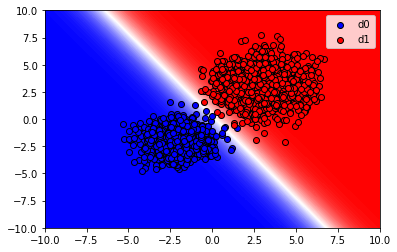

In [8]:
from scipy.stats import multivariate_normal

n_samps_to_draw = 1000
d0 = np.random.multivariate_normal(mu0, sigma0,n_samps_to_draw)
d1 = np.random.multivariate_normal(mu1, sigma1,n_samps_to_draw)
plt.contourf(X, Y, grid_classes, map_size, cmap='bwr')
plt.scatter(d0[:, 0], d0[:, 1], color='b', edgecolors='black', label='d0')
plt.scatter(d1[:, 0], d1[:, 1], color='r', edgecolors='black', label='d1')
plt.legend();